# INMET METHEOROLOGICAL STATIONS - EXPLORATORY DATA ANALYSIS

#### Import modules and libraries

In [1]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from IPython.display import clear_output as co

#### Load data

In [3]:
class Data:
    path = '../../../../Dados/Desafio COR-Rio IV/Meio Ambiente Clima/'

inmet = pd.read_csv(Data.path + 'Meteorologia_INMET.csv'); inmet.head(3)

,primary_key,id_estacao,data,horario,pressao,pressao_minima,pressao_maxima,temperatura_orvalho,temperatura_orvalho_minimo,temperatura_orvalho_maximo,...,umidade_maxima,temperatura,temperatura_minima,temperatura_maxima,rajada_vento_max,direcao_vento,velocidade_vento,radiacao_global,acumulado_chuva_1_h,data_particao
0,A602-2012-04-01 21:00:00,A602,2012-04-01,21:00:00,1014.5,1014.5,1014.7,NaN,NaN,NaN,...,NaN,24.3,24.2,24.7,5.0,NaN,4.0,74.565,0.0,2012-04-01
1,A602-2012-04-01 17:00:00,A602,2012-04-01,17:00:00,1014.5,1014.5,1015.0,NaN,NaN,NaN,...,NaN,25.9,25.2,26.6,5.1,NaN,4.1,2817.476,0.0,2012-04-01
2,A602-2012-04-01 16:00:00,A602,2012-04-01,16:00:00,1015.0,1014.9,1015.7,NaN,NaN,NaN,...,NaN,25.9,24.6,26.3,4.7,NaN,3.8,2913.985,0.0,2012-04-01


---
# 1. Exploratory Data Analysis

### 1. Data types

In [4]:
id_cols = ['primary_key', 'id_estacao', 'data', 'horario', 'data_particao']
float_cols = list(set(inmet.columns).difference(id_cols))

### 2. Index and identity columns

#### Unique index values count

In [5]:
idx = ['Unique Index Values', 'Dataset Size']
vls = [inmet['primary_key'].unique().shape[0], inmet.shape[0]]

pd.DataFrame(vls, idx, ['Rows'])

,Rows
Unique Index Values,964871
Dataset Size,1036001


Duplicate index keys found. The number of unique index values does not match the index size.

#### Unique identity columns' combinations count

In [6]:
inmet.groupby(id_cols[1:4]).first().shape

(964871, 19)

The count of combinations of the three identity columns should match the index size. The number of combinations found match the number of unique index values found.

### 3. Primary keys duplicates

#### Primary key column duplicates count

In [7]:
key_count = inmet['primary_key'].value_counts()
dup_keys = key_count[key_count>1]

dup_keys.shape[0], (dup_keys==2).all()

(71130, True)

Every duplicate key can be found exactly twice.

#### Sample duplicates

In [8]:
inmet.set_index('primary_key').loc[dup_keys.sample(2).index]

,id_estacao,data,horario,pressao,pressao_minima,pressao_maxima,temperatura_orvalho,temperatura_orvalho_minimo,temperatura_orvalho_maximo,umidade,...,umidade_maxima,temperatura,temperatura_minima,temperatura_maxima,rajada_vento_max,direcao_vento,velocidade_vento,radiacao_global,acumulado_chuva_1_h,data_particao
primary_key,,,,,,,,,,,,,,,,,,,,,
A602-2021-03-21 04:00:00,A602,2021-03-21,04:00:00,1015.3,1015.3,1015.6,21.8,21.5,22.4,NaN,...,NaN,24.0,24.0,24.9,NaN,NaN,NaN,-3.537,0.0,2021-03-21
A602-2021-03-21 04:00:00,A602,2021-03-21,04:00:00,1015.3,1015.3,1015.4,20.9,20.9,21.7,NaN,...,NaN,22.8,22.8,23.5,NaN,NaN,NaN,-3.500,0.0,2021-03-21
A652-2021-02-05 16:00:00,A652,2021-02-05,16:00:00,1001.7,1001.5,1002.0,21.3,20.8,21.6,NaN,...,NaN,22.5,22.2,22.7,4.3,NaN,2.0,129.100,5.8,2021-02-05
A652-2021-02-05 16:00:00,A652,2021-02-05,16:00:00,1001.4,1001.4,1002.1,21.4,20.6,22.8,NaN,...,NaN,24.6,23.8,25.4,3.6,NaN,1.8,1553.361,0.0,2021-02-05


Obs:
* Some stations have two records for the same date and time
* Rows with the same index key do not contain the same values but values are very close, as if they were sequential or very close in time. Hint: Average duplicates in data cleaning.

### 4. Date time description

In [9]:
dt = pd.to_datetime(inmet['data'] + ' ' + inmet['horario'])

#### Start and end of time series

In [10]:
dt.min(), dt.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2022-06-02 23:00:00'))

Obs: Twelve and a half years from 2010.

#### Unique date times

In [11]:
len(dt.unique())

108852

#### Date time range size

In [12]:
new_index = pd.date_range(dt.min(), dt.max(), freq='H')

len(new_index)

108864

#### All missing hours in dataset

In [13]:
missing_hours = list(set(new_index).difference(pd.DatetimeIndex(dt.unique())))
len(missing_hours), missing_hours

(12,
 [Timestamp('2022-04-13 19:00:00', freq='H'),
  Timestamp('2022-04-13 20:00:00', freq='H'),
  Timestamp('2022-05-12 17:00:00', freq='H'),
  Timestamp('2022-05-12 19:00:00', freq='H'),
  Timestamp('2022-04-13 23:00:00', freq='H'),
  Timestamp('2022-05-12 21:00:00', freq='H'),
  Timestamp('2022-05-12 22:00:00', freq='H'),
  Timestamp('2022-05-12 23:00:00', freq='H'),
  Timestamp('2022-05-12 20:00:00', freq='H'),
  Timestamp('2022-05-12 18:00:00', freq='H'),
  Timestamp('2022-04-13 22:00:00', freq='H'),
  Timestamp('2022-04-13 21:00:00', freq='H')])

#### Time range in days

In [23]:
time_range = dt.max() - dt.min(); time_range

Timedelta('4535 days 23:00:00')

#### Time range in hours

In [25]:
time_range.days * 24 + time_range.seconds / 60 / 60

108863.0

### 5. Missing Values

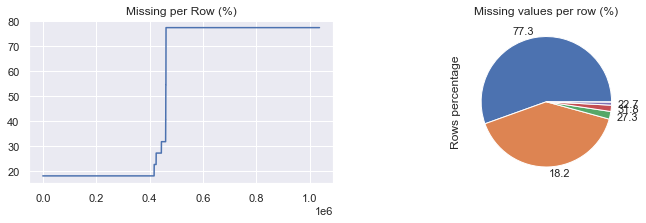

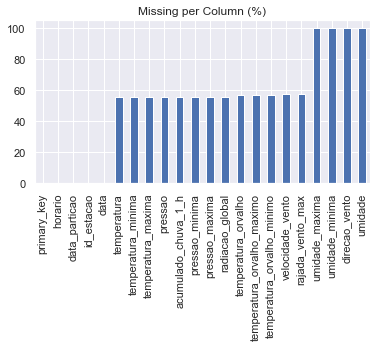

In [26]:
#### Missing per row

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
nan_prct = (100 * inmet.isna().sum(1).sort_values() / inmet.shape[1]).rename('Missing Percantage')
nan_prct.reset_index(drop=True).plot(title='Missing per Row (%)', ax=ax[0])

nan_prct = (inmet.isna().sum(1).value_counts().sort_index()/len(inmet)).rename('Rows percentage')
nan_prct.index = (100 * nan_prct.index.values / inmet.shape[1]).round(1)
nan_prct.sort_values(ascending=False).iloc[:5].plot.pie(title='Missing values per row (%)', ax=ax[1]); plt.show()

#### Missing per column

nan_prct = (100 * inmet.isna().sum().sort_values() / len(inmet)).rename('Missing Percantage')
nan_prct.plot.bar(title='Missing per Column (%)', figsize=(6, 3)); plt.show()

---
# Inmet Time Series

In [35]:
X = inmet.set_index(pd.to_datetime(inmet['data'] + ' - ' + inmet['horario']))

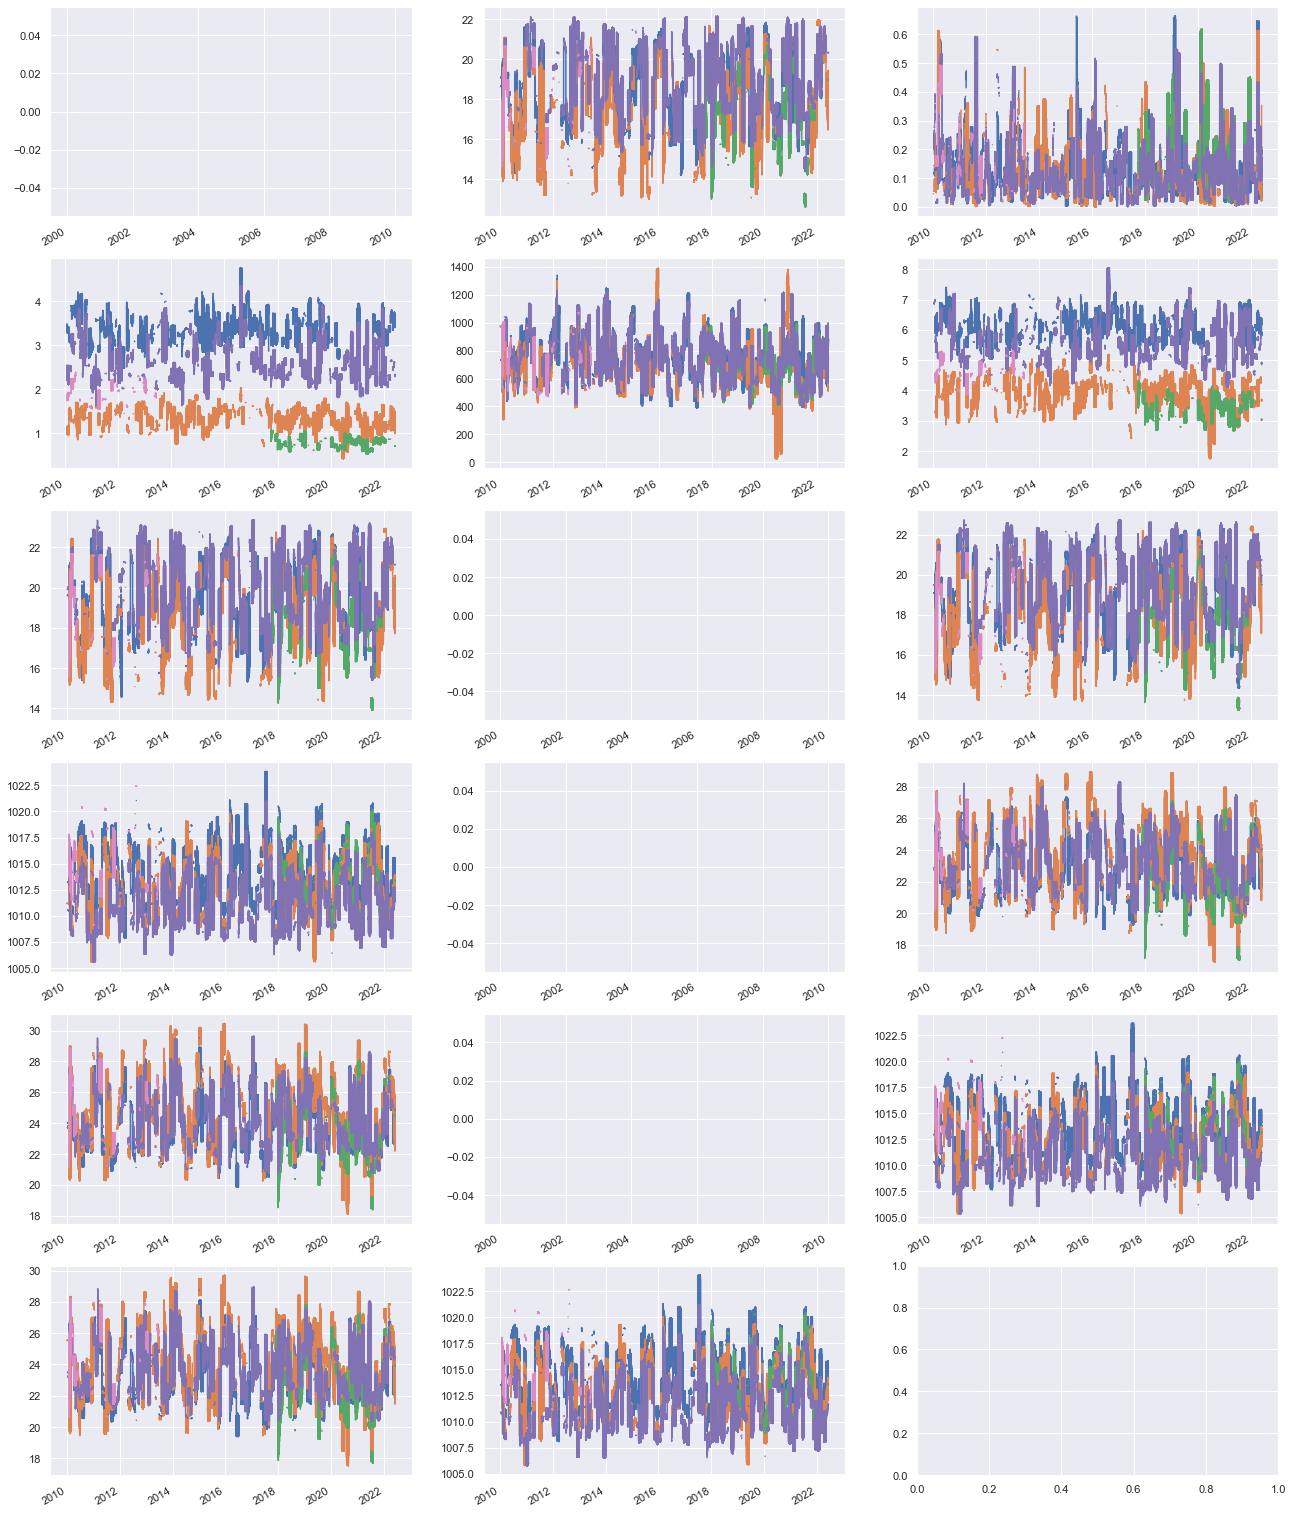

In [44]:
stations = X['id_estacao'].unique()
readings = float_cols
fig, ax = plt.subplots(6, 3, figsize=(22, 30)); ax = ax.reshape(-1)
for station in stations:
    for i, reading in enumerate(readings):
        X[reading][X['id_estacao']==station].rolling(30*24).mean().plot(ax=ax[i])

plt.show()